In [1]:
import pandas as pd
df = pd.read_csv('imdb_indonesian_movies_2.csv')
df.head()

,judul_film,ringkasan_sinopsis,genre
0,Sunan Kalijaga,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Gie,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL Movie,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Sang pencerah,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


In [2]:
# menghapus judul filem karena tidak akan kita gubakan dalam pelatihan data
# data yang akan digunakan ringkasan menjadi fiture dan genre akan menjadi target
df = df.drop(columns=['judul_film'])
df.head()


,ringkasan_sinopsis,genre
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama
3,POL menceritakan kisah hidup yang luar biasa d...,Drama
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama


Karena label kita berupa data kategorikal, maka kita perlu melakukan proses one-hot-encoding. Jalankan kode di bawah untuk melakukan one-hot-encoding dan membuat dataframe baru.

In [3]:
# membuat one-hot-encoding
categoty = pd.get_dummies(df.genre)
df_baru = pd.concat([df, categoty], axis=1)
df_baru

,ringkasan_sinopsis,genre,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,Drama,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,Drama,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,Drama,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,Drama,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,Drama,1,0,0,0,0
...,...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,Romantis,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,Romantis,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",Romantis,0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,Romantis,0,0,0,0,1


In [4]:
# menghapus data genre

df_baru = df_baru.drop(columns='genre')
df_baru


,ringkasan_sinopsis,Drama,Horor,Komedi,Laga,Romantis
0,Raden Mas Said putra sulung Tumenggung Wilarik...,1,0,0,0,0
1,Soe Hok Gie adalah seorang aktivis yang hidup ...,1,0,0,0,0
2,Guru Bangsa Tjokroaminoto menceritakan tentang...,1,0,0,0,0
3,POL menceritakan kisah hidup yang luar biasa d...,1,0,0,0,0
4,Perjalanan pahlawan Indonesia KH Ahmad Dahlan ...,1,0,0,0,0
...,...,...,...,...,...,...
1000,Winter in Tokyo berpusat pada kehidupan Ishida...,0,0,0,0,1
1001,Markonah melarikan diri ke Jakarta karena akan...,0,0,0,0,1
1002,"Tempat aking lebih dari 36 jam, Last Night ada...",0,0,0,0,1
1003,Proyek baru ini adalah tentang seorang lelaki ...,0,0,0,0,1


In [5]:
# memmisahkan data fiture dan data target
# data dibuat dalam bentuk solat

sipnopsis = df_baru['ringkasan_sinopsis'].values
# label di ubah dalam bentuk number
label = df_baru[['Drama', 'Horor', 'Komedi', 'Laga', 'Romantis']].values


In [6]:
sipnopsis

array(['Raden Mas Said putra sulung Tumenggung Wilarikta di bawah Kerajaan Majapahit yang berkuasa di wilayah Tuban melihat sekeluarga miskin yang menderita busung lapar. Ia merasa sangat prihatin dan hati nuraninya tergugah untuk menolong. Kemudian ia mencoba secara diam-diam mengambil makanan dari lumbung orang tuanya. Perbuatan itu tidak disetujui orang tuanya bahkan ia dihukum sekap di gudang makanan itu. Sejak kejadian itu RM Said yang tumbuh dewasa tidak betah tinggal di rumah. Ia berkelana dari daerah satu ke daerah lainnya. Dari sanalah ia tahu betapa banyak penyelewengan dan kesewenang-wenangan para lurah yang munafik. Mereka selalu mengkambing-hitamkan Tumenggung untuk menutupi kejahatannya. Atas laporan RM Said ayahnya kemudian sadar. Tetapi kemudian ia dianggap sebagai sumber fitnah. Dalam kelananya kemudian ia bertemu dengan Sunan Bonang yang banyak mencurahkan ilmunya kepada RM Said. Ia pun kemudian melakukan tapa di pinggir kali. Berkat ketabahannya menghadapi berbagai c

In [7]:
label

array([[1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1]], dtype=uint8)

In [8]:
from sklearn.model_selection import train_test_split

sipnopsis_latih, sipnopsis_test, label_latih, label_test = train_test_split(sipnopsis, label, test_size=0.2)

## Melakukan tokenisasi

In [9]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# banyaknya kata yang akan ditokenisasi 5000 sisanya akan dijadikan x
tokenizer = Tokenizer(num_words=5000, oov_token='x')
# melakukan tokenisasi
tokenizer.fit_on_texts(sipnopsis_latih)
tokenizer.fit_on_texts(sipnopsis_test)

# dari tokenisasi menjadi sequences
sekuens_latih = tokenizer.texts_to_sequences(sipnopsis_latih)
sekuens_test = tokenizer.texts_to_sequences(sipnopsis_test)

# melakukan normalisasi

padded_latih = pad_sequences(sekuens_latih)
padded_test = pad_sequences(sekuens_test)



In [10]:
# membuat model pembelajaran
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [14]:
# membuat optimizer pada model
from tensorflow.keras.optimizers import Adam
Adam(learning_rate=0.000005, name='Adam')
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
# num_epochs = 30
# history = model.fit(
#     padded_latih,
#     label_latih,
#     epochs=num_epochs,
#     validation_data=(padded_test, label_test), 
#     verbose=2
#     )

num_epochs = 30
history = model.fit(padded_latih, label_latih, epochs=num_epochs, 
                    validation_data=(padded_test, label_test),
                    batch_size=128,
                    verbose=2)

Epoch 1/30
7/7 - 48s - loss: 1.5961 - accuracy: 0.2836 - val_loss: 1.6083 - val_accuracy: 0.2537 - 48s/epoch - 7s/step
Epoch 2/30
7/7 - 40s - loss: 1.5663 - accuracy: 0.3632 - val_loss: 1.5993 - val_accuracy: 0.2388 - 40s/epoch - 6s/step
Epoch 3/30
7/7 - 45s - loss: 1.5080 - accuracy: 0.3532 - val_loss: 1.5868 - val_accuracy: 0.1940 - 45s/epoch - 6s/step
Epoch 4/30
7/7 - 45s - loss: 1.5023 - accuracy: 0.3955 - val_loss: 1.5838 - val_accuracy: 0.2239 - 45s/epoch - 6s/step
Epoch 5/30
7/7 - 42s - loss: 1.4384 - accuracy: 0.4440 - val_loss: 1.6109 - val_accuracy: 0.2438 - 42s/epoch - 6s/step
Epoch 6/30
7/7 - 43s - loss: 1.3668 - accuracy: 0.4303 - val_loss: 1.5724 - val_accuracy: 0.2239 - 43s/epoch - 6s/step
Epoch 7/30
7/7 - 40s - loss: 1.2736 - accuracy: 0.4428 - val_loss: 1.5947 - val_accuracy: 0.2090 - 40s/epoch - 6s/step
Epoch 8/30
7/7 - 41s - loss: 1.1585 - accuracy: 0.4888 - val_loss: 1.6711 - val_accuracy: 0.2438 - 41s/epoch - 6s/step
Epoch 9/30
7/7 - 43s - loss: 1.0326 - accuracy: 

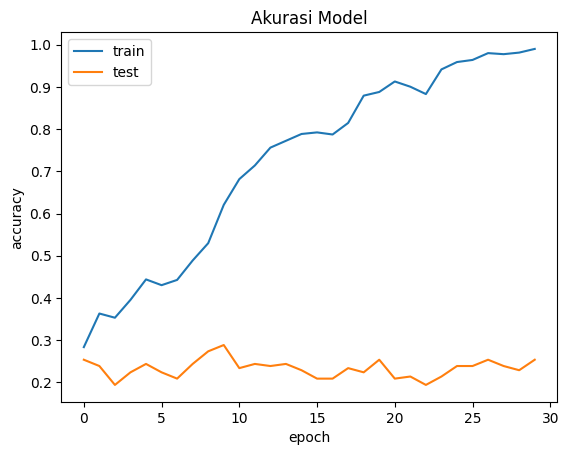

In [16]:

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

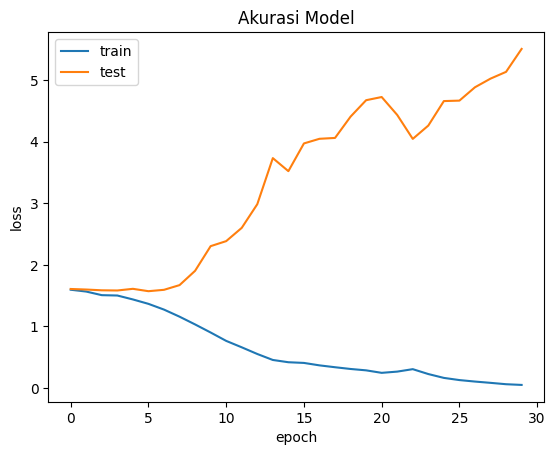

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Akurasi Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()